In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("../../output/current_values.csv", index_col=0)


hf = pd.read_csv("../../output/Codes/2digit_occupations.csv", index_col=0)
hf = hf.set_index("codes")
cf = pd.read_csv("../../output/Codes/1digit_occupations.csv", index_col=0)
cf = cf.set_index("codes")


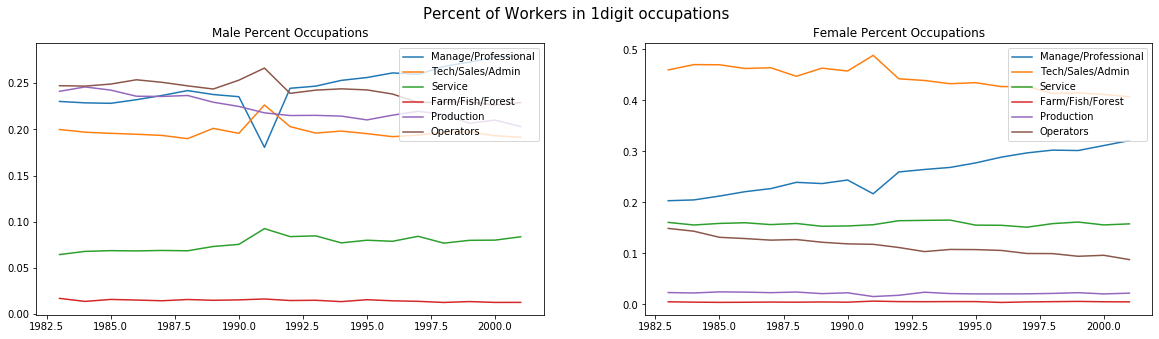


These graphs are a great repersentation of why women's wages would increase more than male wages. In the female 
graph, the percentage of women in lucrative professions such as Manage/Professional and Service increase while the 
lower paying professions such as Operators decrease as a percentage. On the other, male percent occupations stays 
pretty consistent throughout the graph except in the beggining, which demonstrates why men did not have as great an 
increase in wages as women. Additionally, it leads me to believe that the male increase in wages came from better 
pay rather than greater percentage of men going into the money making fields.



In [8]:
df = df[(df["Female"]!=0) | (df["Male"]!=0)]
years_grouped = df.groupby(['Female','Year'])["Asecwt"].sum().reset_index()
years_grouped = years_grouped.rename(columns={"Asecwt":"big"})
grouped = df.groupby(["Female",'1digit occupation',"Year"])["Asecwt"].sum().reset_index()
grouped = grouped.merge(years_grouped, on=["Female","Year"], how="left")
grouped["percent"] = grouped["Asecwt"] / grouped["big"]
plt.figure(figsize=[20,5])
digit = 1
digit_sex = 0
employments= []
years= []
plt.subplot(1,2,1)
for x in range(len(grouped)):
    female = grouped.iloc[x][0]
    one = grouped.iloc[x][1]
    year = grouped.iloc[x][-1]
    employment_percent = grouped.iloc[x][2]
    if digit != one:
        plt.plot(employments,years, label=cf.loc[digit]["occupation"])
        digit = one
        years = []
        employments = []
    if digit_sex != female:
        plt.title("Male Percent Occupations")
        plt.legend(loc=1)
        plt.subplot(1,2,2)
        digit_sex=female
    years.append(year)
    employments.append(employment_percent)
plt.plot(employments, years,label=cf.loc[digit]["occupation"])
plt.legend(loc=1)
string = "Percent of Workers in 1digit occupations"
plt.suptitle(string,fontsize=15)
plt.title("""Female Percent Occupations""")
plt.show()
print("""
These graphs are a great repersentation of why women's wages would increase more than male wages. In the female 
graph, the percentage of women in lucrative professions such as Manage/Professional and Service increase while the 
lower paying professions such as Operators decrease as a percentage. On the other, male percent occupations stays 
pretty consistent throughout the graph except in the beggining, which demonstrates why men did not have as great an 
increase in wages as women. Additionally, it leads me to believe that the male increase in wages came from better 
pay rather than greater percentage of men going into the money making fields.
""")